# Статистический анализ данных сервиса аренда самокатов Go Fast

В нашем распоряжении данные сервиса аренды самокатов Go Fast. Сервис предоставил данные о некоторых пользователях из нескольких городов, а также об их поездках и подписках. Необходимо проанализировать данные и проверить некоторые гипотезы, которые могут помочь бизнесу вырасти. 

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Объединение-данных" data-toc-modified-id="Объединение-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Объединение данных</a></span></li><li><span><a href="#Подсчёт-выручки" data-toc-modified-id="Подсчёт-выручки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Подсчёт выручки</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Распределения" data-toc-modified-id="Распределения-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Распределения</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

***Цель проекта***  

Цель проведения исследования изучить поведение пользователей сервиса и выявить закономерности которые позволят увеличить количество пользователей с подпиской.

***Задачи проекта***  
1. Провести предварительный анализ данных для понимания их структуры и полноты.
2. Обработать и очистить данные от выбросов и недостающих значений, чтобы обеспечить корректность последующих анализов.  
3. Исследовать данные о поведении пользователей и их поездках.  
4. Провести проверку гипотез для увеличения числа пользователей c подпиской при помощи акций.  
5. Сделать общий вывод на основании проведенного исследования и дать рекомендации заказчику.

***Описание данныx***  

Исследование проводится на наборе данных  сервиса аренды самокатов Go Fast. Данные предоставлены в трех датасетах и содержат следующую информацию: 

1. Пользователи — users_go.csv
- user_id (уникальный идентификатор пользователя);
- name (имя пользователя);
- age (возраст);
- city (город);
- subscription_type (тип подписки free, ultra).  

2. Поездки — rides_go.csv  
- user_id (уникальный идентификатор пользователя);
- distance (расстояние, которое пользователь проехал в текущей сессии (в метрах));
- duration (продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»);
- date (дата совершения поездки).  

3. Подписки — subscriptions_go.csv
- subscription_type	(тип подписки);
- minute_price (стоимость одной минуты поездки по данной подписке);
- start_ride_price (стоимость начала поездки);
- subscription_fee (стоимость ежемесячного платежа).

#### Загрузка данных

Импортируем бибилиотеку Pandas и сохраним предоставленные данные в 3 датафрейма ***users, rides и subscriptions***.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from math import factorial
from scipy.stats import binom

import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

Посмотрим первые строки каждого датафрейма чтобы изучить информацию в каждом из них по очереди.

In [3]:
users.head(10)

,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


In [4]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


Пропущенных значений в датафрейме нет. Посмотрим датафрейм с данными о поездках.

In [5]:
rides.head(10)

,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


In [6]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


Пропусков в данных о поездках нет. Посмотрим данные о подписках.

In [7]:
subscriptions.tail()

,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


In [8]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


Пропусков также нет в данных о подписках.

#### Предобработка данных

***2.1.*** При изучении общей инофрмации о датафреймах замечено, что в датафрейме ***rides*** необходимо изменить тип данных в столбце date с object на datatime64.

In [9]:
rides['date'] = pd.to_datetime(rides['date'], format = '%Y-%m-%d')

In [10]:
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1)
memory usage: 564.8 KB


Обратим внимание, что формат у нас datetime64[ns], ns обозначает 'наносекунды', это означает, что хранится дата и время с высокой точностью включая более мелкие единицы измерения, такие как наносекунды.

***2.2.*** После преобразования формата создадим новый столбец в датафрейме ***rides*** с указанием месяца совершения поездки, что будет удобно в дальнейшем при анализе активности пользователей по месяцам. Название столбцу передадим ***date_month***.

In [11]:
rides['date_month'] = rides['date'].dt.month

Проверим отражены ли изменения в датафрейме

In [12]:
rides.head(5)

,user_id,distance,duration,date,date_month
0,1,4409.919140,25.599769,2021-01-01,1
1,1,2617.592153,15.816871,2021-01-18,1
2,1,754.159807,6.232113,2021-04-20,4
3,1,2694.783254,18.511000,2021-08-11,8
4,1,4028.687306,26.265803,2021-08-28,8


***2.3.*** На этапе загрузки датафреймов по общей информации видно что пропусков в столбцах нет. Но стоит удостовериться, сделаем это с помощью ***isna().sum()*** 

In [13]:
users.isna().sum()

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64

In [14]:
rides.isna().sum()

user_id       0
distance      0
duration      0
date          0
date_month    0
dtype: int64

In [15]:
subscriptions.isna().sum()

subscription_type    0
minute_price         0
start_ride_price     0
subscription_fee     0
dtype: int64

Пропусков в данных нет. Теперь проверим таблицы на строки дубликаты c помощью ***duplicated()***.

In [16]:
users.duplicated().sum()

31

В таблице ***users*** найдена 31 строка дубликат. Теоретически это могли бы быть просто люди с одинакомыи именами, возрастом и одного и того же города, но так как у нас есть столбец ***user_id*** который содержит уникальный индентификатор пользователя можно точно сказать что это дубликаты, и удалить их.

In [17]:
users = users.drop_duplicates()

Также стоит проверить столбец с названиями городов на предмет неявных дубликатов. Проверку проведем вручную, для этого отразим списов уникальных названий столбца ***city***.

In [18]:
users['city'].unique()

array(['Тюмень', 'Омск', 'Москва', 'Ростов-на-Дону', 'Краснодар',
       'Пятигорск', 'Екатеринбург', 'Сочи'], dtype=object)

С наименованием городов все в порядке, неявных дубликатов нет. Теперь посмотрим на дубликаты в таблице ***rides***.

In [19]:
rides.duplicated().sum()

0

Строки дубликаты не обнаружены в датафрейме. Проверим и таблицу ***subscriptions*** на предмет дубликатов.

In [20]:
subscriptions.duplicated().sum()

0

***Промежуточный вывод по разделу:*** 

В процессе изучения и предобработки данных выполнены следующие шаги:  
1. в датафрейме ***users*** удалены строки-дубликаты в количестве 31 строка.  
2. в датафрейме ***rides***:
- изменен тип данных в столбце ***date*** с object на datatime64;  
- выведен отдельный столбец ***date_month*** с указанием месяца по каждой поездке.
3. в датафрейме ***subscriptions***, нет пропусков в данных, как и в остальных датафреймах.

#### Исследовательский анализ данных

***3.1.Частота встречемости городов***

Теперь рассмотрим данные более детально. Посмотрим какое количество пользователей в каждом городе и визуализируем эти данные. Указание города есть в датафрейме ***users***, построим сводную таблицу методом ***pivot_table()***.

In [21]:
users_cities = users.pivot_table(index='city', values = 'user_id', aggfunc = {'user_id': 'count'}).rename(columns={'user_id': 'count_cities'})
users_cities.reset_index(inplace=True)
users_cities.sort_values(by = 'count_cities', ascending=False, inplace=True)
users_cities

,city,count_cities
4,Пятигорск,219
0,Екатеринбург,204
5,Ростов-на-Дону,198
1,Краснодар,193
6,Сочи,189
3,Омск,183
7,Тюмень,180
2,Москва,168


Построим график и отразим эти данные визуально. Сначала добавим бибилотеку ***matplotlib***

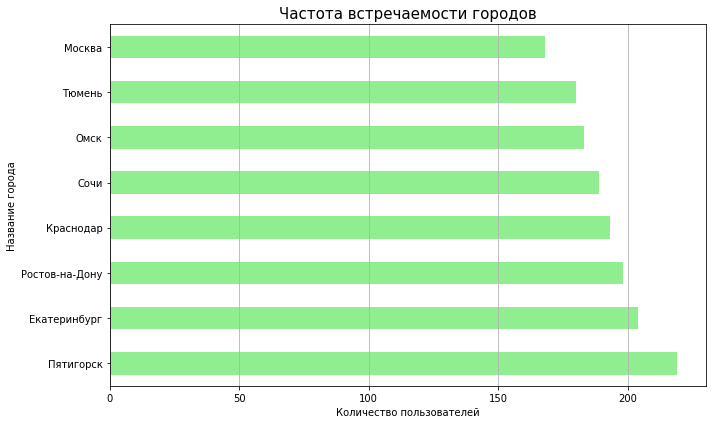

In [22]:
users_cities.plot(x='city', y='count_cities', kind='barh', figsize=(10, 6), legend=False, color='lightgreen')

plt.title('Частота встречаемости городов', fontsize=15)
plt.xlabel('Количество пользователей')
plt.ylabel('Название города') 
plt.xticks(rotation=0) 
plt.grid(axis='x')

plt.tight_layout()
plt.show()

***Промежуточный вывод:***   
Большего всего пользователей в Пятигорске 219, а самое маленькое количество в Москве 168. При этом разброс не сильно большой в разнице между количеством пользователей в городах. Однако интересен факт - что Москва, в которой самое большое по численности население из представленных городов, на последнем месте списка. Все перечисленные города одни из крупнейших в России (входят в 20-ку самых населенных). 

***3.2. Cоотношение пользователей с подпиской и без подписки*** 

Сервис аренды самокатов имеет 2 варианта использования - с подпиской (***ultra***) и без (***free***). Посмотрим на соотношение доли тех кто пользуется сервисом с помощью подписки и без. Для этого обратимся к тому же датафрейму ***users*** к столбцу ***subscription_type***. Построим сводную таблицу методом ***pivot_table***.

In [23]:
users_subscription_type = users.pivot_table(index='city', columns='subscription_type', values='user_id', aggfunc='count')
users_subscription_type.reset_index(inplace=True)
users_subscription_type.columns = ['city','count_subscription_free', 'count_subscription_ultra']
users_subscription_type

,city,count_subscription_free,count_subscription_ultra
0,Екатеринбург,112,92
1,Краснодар,112,81
2,Москва,84,84
3,Омск,92,91
4,Пятигорск,125,94
5,Ростов-на-Дону,109,89
6,Сочи,103,86
7,Тюмень,98,82


Добавим в эту таблицу данные об общем количестве ползователей каждого города, и процент пользователей с подпиской и без. Показатель в процентах округлим до 2х знаков после запятой.

In [24]:
users_subscription_type['total_users'] = users_subscription_type['count_subscription_free']+ users_subscription_type['count_subscription_ultra']
users_subscription_type['percentage_ultra'] = (users_subscription_type['count_subscription_ultra'] / users_subscription_type['total_users'] * 100).round(2)
users_subscription_type['percentage_free'] = (users_subscription_type['count_subscription_free'] / users_subscription_type['total_users'] * 100).round(2)
users_subscription_type

,city,count_subscription_free,count_subscription_ultra,total_users,percentage_ultra,percentage_free
0,Екатеринбург,112,92,204,45.10,54.90
1,Краснодар,112,81,193,41.97,58.03
2,Москва,84,84,168,50.00,50.00
3,Омск,92,91,183,49.73,50.27
4,Пятигорск,125,94,219,42.92,57.08
5,Ростов-на-Дону,109,89,198,44.95,55.05
6,Сочи,103,86,189,45.50,54.50
7,Тюмень,98,82,180,45.56,54.44


Визуализируем эти данные на графике.

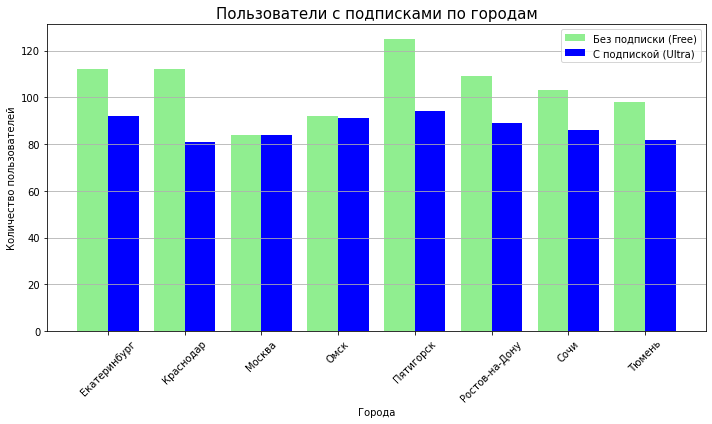

In [25]:
plt.figure(figsize=(10, 6))
x = np.arange(len(users_subscription_type['city']))
width = 0.4

plt.bar(x - width/2, users_subscription_type['count_subscription_free'], width, label='Без подписки (Free)', color='lightgreen')
plt.bar(x + width/2, users_subscription_type['count_subscription_ultra'], width, label='С подпиской (Ultra)', color='blue')

plt.title('Пользователи с подписками по городам', fontsize=15)
plt.xlabel('Города')
plt.ylabel('Количество пользователей')
plt.xticks(x, users_subscription_type['city'], rotation=45)
plt.grid(axis='y')
plt.legend()

plt.tight_layout()
plt.show()

***Промежуточный вывод:***  
Во всех городах число пользователей использующих сервис без подписки выше, чем с подпиской. Исключение - Москва, где одинаковое соотношение пользователей с подпиской и без нее. Самое большое число пользователей ез подписки - в Краснодаре (58.03%),  а самое маленьков в Москве (50%). Здесь можно предположить, что пользователь не покупающий подписку, либо редко пользуется сервисом и не видит необходимости оплаты подписки на целый месяц или же наравне с GoFast пользуется альтернативными сервисами аренды самокатов в своем городе. 

***3.3. Возраст пользователей***

Рассмотрим возрастные группы подписчиков и поймем кто чаще использует сервис. Обратимся к стобцу ***age*** датафрейма ***users*** и создадим сводную таблицу методом ***pivot_table***, чтобы скомпоновать возрастные группы.

In [26]:
users_age = users.pivot_table(index='age', values='user_id', aggfunc='count')
users_age.reset_index(inplace=True)
users_age.columns = ['age', 'count_users']
users_age

,age,count_users
0,12,4
1,13,8
2,14,9
3,15,13
4,16,19
5,17,26
6,18,46
7,19,47
8,20,71
9,21,93


Визуализируем полученные данные на графике.

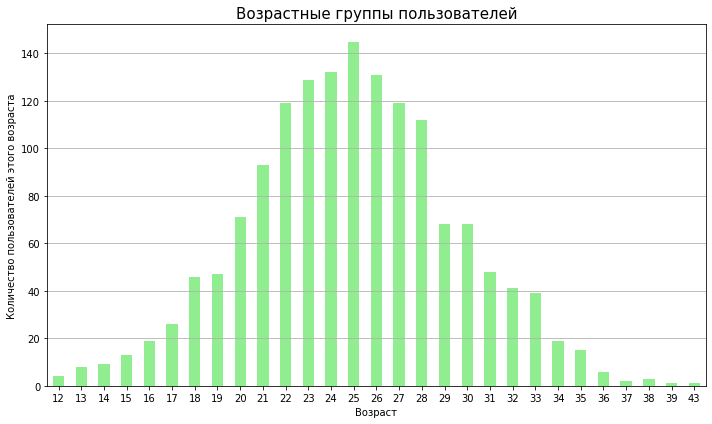

In [27]:
users_age.plot(x='age', y='count_users', kind='bar', figsize=(10, 6), legend=False, color='lightgreen')

plt.title('Возрастные группы пользователей', fontsize=15)
plt.xlabel('Возраст')
plt.ylabel('Количество пользователей этого возраста') 
plt.xticks(rotation=0) 
plt.grid(axis='y')

plt.tight_layout()
plt.show()

Посмотрим на числовое описание данных столбца ***age*** с помощью метода ***describe()***

In [28]:
users['age'].describe()

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

***Промежуточный вывод:***  
Пользователи представлены в возрастах от 12 до 43 лет. А средний возраст пользователя 25 лет.  
25-й процентиль (25%): 22 года. Это означает, что у 25% возраст пользователей младше или равен этому возрасту.  
75-й процентиль (75%): 28 лет. Указывает что более четверти клиентов имеют возраст больше или равный 28 годам.

На графике видно, что основная возрастная группа пользователей от 18 до 30 лет. Причем в этой группе наибольшее количество пользователей возраста от 22 до 28 лет. Возможно пердвижение с помощью сервиса аренды самокатов предпочтительнее для данной группы так как не требует наличия водительских прав и удобно ввиду активного образа жизни.  
После 28 лет интерес к сервису значительно снижается, возможно такое снижение связано с наличием автомобиля у более страших возрастных групп, а также появлением семьи и ребенка и самокат уже не подходит под нужды данной группы.  
После 35 лет количество пользователей падает еще заметнее, что указывает на отсутствие интереса к такому виду транспорта.
Также стоит обратить внимание на пользователей до 18 лет, их не много, относительно общего числа пользователей - хотя быть не должно вообще, так как использвание сервисов аренды самокатов лицам не достигшим 18-летнего возраста запрещено и стоит продумать над ограничением аренды для несовершеннолетних. 

***3.4. Расстояние, которое пользователь преодолел за одну поездку***

Обратимся к столбцу ***distance*** датафрейма ***rides***  в котором содержится информация о расстоянии которое пользователь преодолел за время поездки в метрах. Построим диаграмму размаха и посмотрим на разброс занчений длительности поездки в метрах.

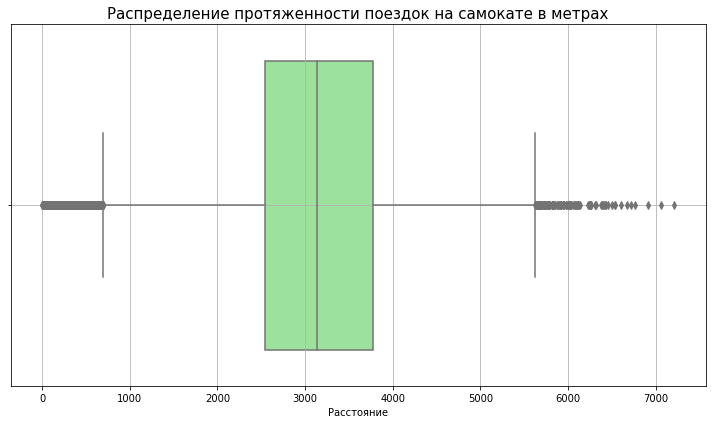

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=rides['distance'], color='lightgreen')
plt.title('Распределение протяженности поездок на самокате в метрах', fontsize=15)
plt.xlabel('Расстояние')
plt.grid(True)

plt.tight_layout()
plt.show()

Выбросы на графике есть слева и справа от межквартильного размаха. Посмотрим на числовое описание данных столбца ***distance*** датафрейма ***rides***.

In [30]:
rides['distance'].describe()

count    18068.000000
mean      3070.659976
std       1116.831209
min          0.855683
25%       2543.226360
50%       3133.609994
75%       3776.222735
max       7211.007745
Name: distance, dtype: float64

Построим сводную таблицу по столбцу ***distance*** для каждого пользователя, и посмотрим на медианное время поездки и на количество поездок каждого пользователя. 

In [31]:
median_distance_user = rides.pivot_table(index='user_id', values='distance', aggfunc=['median', 'count'])
median_distance_user.reset_index(inplace=True)
median_distance_user.columns = ['user_id', 'median_distance', 'count_rides']
median_distance_user

,user_id,median_distance,count_rides
0,1,2806.504429,12
1,2,3105.086678,11
2,3,2858.693148,12
3,4,3373.276987,14
4,5,3244.021903,11
...,...,...,...
1529,1530,2724.331740,17
1530,1531,2999.913238,23
1531,1532,2615.477834,13
1532,1533,2965.546552,13


In [32]:
median_distance_user['count_rides'].describe()

count    1534.000000
mean       11.778357
std         4.157738
min         2.000000
25%         9.000000
50%        12.000000
75%        14.000000
max        27.000000
Name: count_rides, dtype: float64

***Промежуточный вывод:*** 

Проанализировав данные о поездках выяснилось, что медианное количество поездок одного пользователя 12.  
Максимальное количество 27, а минимальное 2. Всего 1534 пользователя совершили 18068 поездок.

Разброс дальности поездок по расстоянию от 0.85 м. (менее 1 метра) до 7211 м. (7,2 км.).  Медианное расстояние преодолеваемое пользователями за одну поездку 3133 м. (3,1 км.), что говорит о выборе сервиса аренды самокатов для преодоления расстояние в несколько километров. 

Стандартное отклонение 1116.83 м.(1,1 км.), то есть разброс значений по расстоянию поездки в пределах этого значения, можно сказать что расстояния, которые преодолевают пользователи, варьируются существенно.  

Границы диаграммы размаха говорит о том, что основная часть поездок по расстоянию от 693.73 м. (0,6 км.) до 5625.71 м.(5.6 км.).

Судя по вышеописанным статистическим данным, можно сказать, что использование самокатов довольно популярно среди пользователей для преодоления расстояний, близких к 3 километрам, с заметными вариациями в длине поездок. При этом есть пользователи, которые используют самокаты для коротких поездок и долгих расстояний.

***3.5 Продолжительность поездок***

Обратимся к столбцу ***duration*** датафрейма ***rides*** в котором содержится информация о времени каждой поездки в минутах. Построим диаграмму размаха и посмотрим на разброс значений длительности поездки по времени.

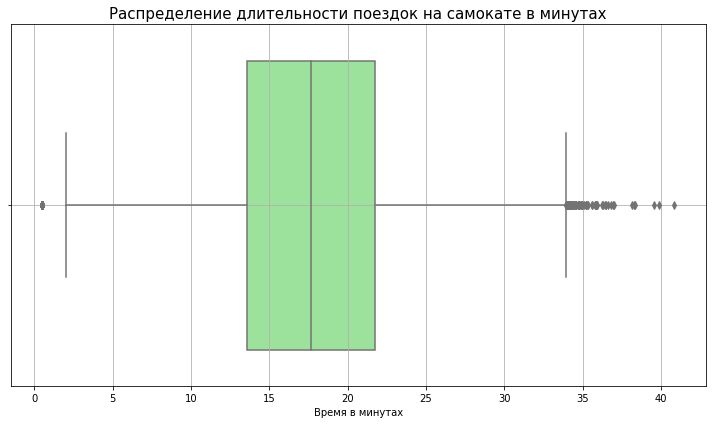

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=rides['duration'], color='lightgreen')
plt.title('Распределение длительности поездок на самокате в минутах', fontsize=15)
plt.xlabel('Время в минутах')
plt.grid(True)

plt.tight_layout()
plt.show()

Визуально, можно сказать то основное количество поездок в пределах от 13 до 23 минут. Однако на графике присутствуют и аномальные значения менее 2 минут и более 34.  

Взглянем на описание данных столбца ***duration*** в численном формате.

In [34]:
rides['duration'].describe()

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

Здесь бросается в глаза минимальный показатель в 0.5 (пол минуты) длительност поездки, посмотрим на расстояние которое проехали пользователи за это время.

Проверим себя и построим график отношения длительности поездки к дистанции, если есть ошибочные значения они будут явно видны.

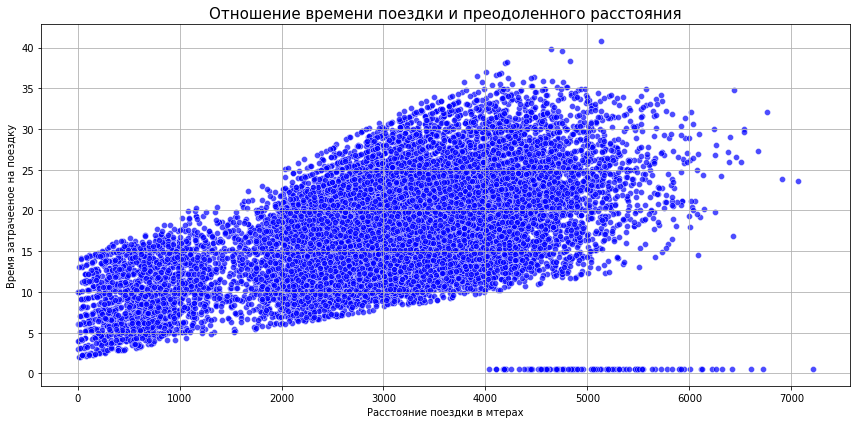

In [35]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=rides, x='distance', y='duration', alpha=0.7, color='blue')

plt.title('Отношение времени поездки и преодоленного расстояния', fontsize=15)
plt.xlabel('Расстояние поездки в мтерах')
plt.ylabel('Время затрачееное на поездку')
plt.tight_layout()

plt.grid(True)
plt.show()

Вот выбросы и показались вдоль оси X на графике, 95 поездок длительностью пол минуты, но эа это время пользователь не мог проехать такие расстояния. Так как даты поездок разные говорить о разовом техническом сбое не приходится. Это явно ошибочные показатели и стоит обратить внимание на эту техническую проблему, а пока рассчитаем среднее время для преодоления 1 километра и заменим длительности поездок, где в ячейках стоит неверный показатель. Сначала отфильтруем поездки длительнее 0.5 минуты и рассчитаем время на преодоления 1 км.

In [36]:
correct_rides_duration = rides[rides['duration'] > 0.5]

correct_rides_duration['time_km'] = correct_rides_duration['duration'] / (correct_rides_duration['distance'] / 1000)
average_time_km = correct_rides_duration['time_km'].median() 

rides.loc[rides['duration'] == 0.5, 'duration'] = average_time_km * (rides['distance'] / 1000)


Проверим произошли ли изменения построив снова график отношения длительности поездки к преодоленному расстоянию.

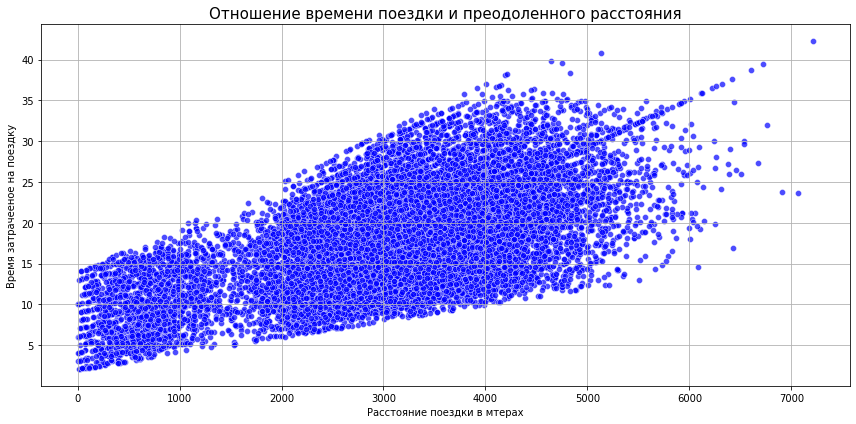

In [37]:
plt.figure(figsize = (12, 6))
sns.scatterplot(data=rides, x='distance', y='duration', alpha=0.7, color='blue')

plt.title('Отношение времени поездки и преодоленного расстояния', fontsize=15)
plt.xlabel('Расстояние поездки в мтерах')
plt.ylabel('Время затрачееное на поездку')
plt.tight_layout()

plt.grid(True)
plt.show()

Некорректные значения поправили, теперь еще раз обратимся к числовому описанию столбца ***duration*** с корректными данными.

In [38]:
rides['duration'].describe()

count    18068.000000
mean        17.960088
std          6.030008
min          2.035632
25%         13.697117
50%         17.750643
75%         21.824361
max         42.299772
Name: duration, dtype: float64

***Промежуточный вывод:***  
Медианное время поездки 17,75 мин., а среднее 17.96 мин., это говорит о том, что не смотря на наличие очень которких и очень длительных поездок отноcительно основной массы, их не много и они не сильно искажают представление о средней длительности поездки пользователей.
Стандартное отклоенение 6.03 мин., говорит о том, что длительность поездок варьируется относительно среднего на 6.03 минуты, указывая на разнообразие в длительности поездок.  
Минимальное время 2.04 мин., говорит о коротких поездках на небольшие расстояния.  
25-й процентиль (25%): 13.69 минуты. Это означает, что 25% поездок длится 13.69 минут или меньше.   
75-й процентиль (75%): 21.82 минуты. Это значение указывает на длительность, равную или меньшую 21.82 минуты у 75% поездок, что означает, что более четверти поездок длится дольше.  

Большинство пользователей заканчивают свои поездки в диапазоне от 14 до 22 минут, что может указывать на частое использование для удобных, средних маршрутов.  
Важно обратить внимание на поездки с длительностью более 42 минут и понять, что могло привести к таким долгим поездкам. Это может включать в себя анализ маршрутов, адресов отправления и назначения, а также потенциальные задержки или время ожидания пользователя в момент остановок.

Есть еще один важный момент в разнице поведения пользователей, если обратим внимание на поездки до 15 минут то у пользователей без подписки гораздо больше поездок на короткие расстояния до 500 метров где им требуется очень много времени на преодоление дистанции, что противоречит здравому смыслу когда арендуешь самокат. Причину такой аномалии стоит детально проанализировать, а пока предположить можно следующие причины:

- технически неисправные самокаты, это может увеличить общее время поездки.
- пользователи, которые не привыкли к электросамокатам или только начинают пользоваться ими, могут ехать медленно, опасаясь упасть или столкнуться с препятствиями.
- маршрут пользователей имеет много препятствий (пешеходы, автомобильный транспорт, нерегулируемые перекрестки и т.д.), это может заставить пользователей снижать скорость или остановливаться очень часто.

Рекомендуется провести глубокий анализ данных, чтобы понять, какие пользователи тратят больше времени, и провести дополнительное исследование с целью выяснения причин.

#### Объединение данных

***4.1.*** Теперь для удобства ипроведения дальнейшего исследования объедими датафремы ***users, rides, subscriptions*** в один. Сначала объединим ***users и rides***  в одну таблицу по столбцу ***user_id*** и сохраним результата в переменную ***merged_data***.

In [39]:
merged_data = pd.merge(users, rides, on='user_id', how='left')
merged_data

,user_id,name,age,city,subscription_type,distance,duration,date,date_month
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8
...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11


Теперь объединим таблицe ***merged_data*** и ***subscriptions*** по столбцу ***subscription_type*** и сохраним в переменную ***final_data***

In [40]:
final_data = pd.merge(merged_data, subscriptions, on='subscription_type', how='left')
final_data

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


***4.2.*** Теперь создадим 2 датафрейма разделив все данные на 2 категории, данные о пользователях с подпиской (ultra) сохранив новый датафрейм в переменную ***users_ultra***  и данные о пользователях без подписки (free) сохраним в переменную ***users_free***.

In [41]:
free_users = final_data[final_data['subscription_type'] == 'free']
free_users

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.690719,14.944286,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.932642,16.234663,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.434142,20.016628,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.911290,9.782872,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.379435,17.427673,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.098080,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.423057,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.185507,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.308661,16.674362,2021-11-27,11,8,50,0


In [42]:
ultra_users = final_data[final_data['subscription_type'] == 'ultra']
ultra_users

,user_id,name,age,city,subscription_type,distance,duration,date,date_month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.919140,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.592153,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.159807,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.783254,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.687306,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.046497,24.671163,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.702563,15.892886,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.159348,14.389525,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.845501,15.839579,2021-10-17,10,6,0,199


Теперь сравним время поездок пользователей обеих категорий с помощью гистограммы.

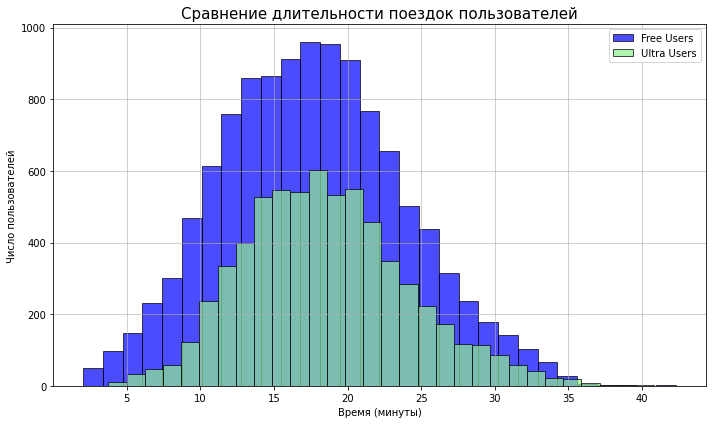

In [43]:
plt.figure(figsize=(10, 6))

plt.hist(free_users['duration'], bins=30, color='blue', edgecolor='black', alpha=0.7, label='Free Users')
plt.hist(ultra_users['duration'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Ultra Users')

plt.title('Сравнение длительности поездок пользователей', fontsize=15)
plt.xlabel('Время (минуты)')
plt.ylabel('Число пользователей')
plt.grid(axis='both', alpha=0.75)
plt.legend()
plt.tight_layout()

plt.show()

По графику видно распредление времени обеих категорий пользователей практически одинаково. Пользователи с подпиской в среднем проводят больше времени на поездках, но эта разница не кажется значительной. Существует меньшее разнообразие в длительности поездок у подписчиков, что может указывать на более целенаправленное использование самокатов.

Теперь сравним расстояние которое преодолевают пользователи обеих категорий с помощью гистограммы.

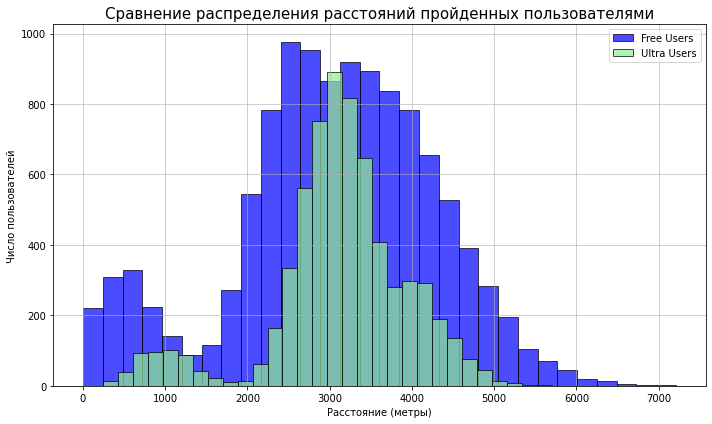

In [44]:
plt.figure(figsize=(10, 6))

plt.hist(free_users['distance'], bins=30, color='blue', edgecolor='black', alpha=0.7, label='Free Users')
plt.hist(ultra_users['distance'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7, label='Ultra Users')

plt.title('Сравнение распределения расстояний пройденных пользователями', fontsize=15)
plt.xlabel('Расстояние (метры)')
plt.ylabel('Число пользователей')
plt.grid(axis='both', alpha=0.75)
plt.legend()
plt.tight_layout()

plt.show()

Пользователи с подпиской имеют в среднем чуть более длинные поездки, с меньшим разбросом, что может быть обусловлено более регулярным использованием сервиса. У категории Free гораздо больше людей используют самокат для преодоления расстояний менее 1000 метров и наиболее часто проезжают примерно 2,5 км. до 3,8 км. А вот пользователи Ultra предпочитают самокат для преодоления от 3 до 3,5 км.

***Промежуточный вывод:***   
Пользователи с подпиской в среднем проводят больше времени на поездках, но эта разница не кажется значительной. Существует меньшее разнообразие в длительности поездок у подписчиков, что может указывать на более целенаправленное использование самокатов.  
Интересно неравномерное распределение дальности поездок у пользователей с подпиской этот 'провал' на интервале от 1.8 до 2 км., а у пользователей без подписки от 1.3 до 1.6 км., это модет говорить о том что при необходимости преодолеть эти расстояния пользователи предпочитают другие способы передвижения. 
Пользователи без подписки больше используют самокат для преодоления расстояний менее 1000 метров и наиболее часто проезжают примерно 2,5 км. до 3,8 км. А вот пользователи Ultra предпочитают самокат для преодоления от 3 до 3,5 км.


#### Подсчёт выручки

***5.1.*** Cуммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц.   

Для обобщения информации о поездках каждого пользователя по месяцам сгруппируем данные по столбцам ***user_id, name и month*** датафрейма ***final_data***, вычисляя итоги для расстояния, количества поездок и общей продолжительности. Сохранив полученный резeльтат в переменную ***aggregated_data***.

In [45]:
aggregated_data = final_data.groupby(['user_id', 'name', 'date_month']).agg(total_distance=('distance', 'sum'),total_trips=('distance', 'count'),total_duration=('duration', 'sum'), minute_price=('minute_price', 'first'),
start_ride_price=('start_ride_price', 'first'), subscription_fee=('subscription_fee', 'first'), subscription_type=('subscription_type', 'first')).reset_index()
aggregated_data

,user_id,name,date_month,total_distance,total_trips,total_duration,minute_price,start_ride_price,subscription_fee,subscription_type
0,1,Кира,1,7027.511294,2,41.416640,6,0,199,ultra
1,1,Кира,4,754.159807,1,6.232113,6,0,199,ultra
2,1,Кира,8,6723.470560,2,44.776802,6,0,199,ultra
3,1,Кира,10,5809.911100,2,31.578017,6,0,199,ultra
4,1,Кира,11,7003.499363,3,53.397424,6,0,199,ultra
...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,6,3409.468534,2,24.812678,8,50,0,free
11327,1534,Альберт,8,7622.453034,2,47.205960,8,50,0,free
11328,1534,Альберт,9,4928.173852,1,22.560373,8,50,0,free
11329,1534,Альберт,11,13350.015305,4,76.342174,8,50,0,free


***5.2*** Помесячная выручка каждого пользователя сервиса

Сначала округлим значения столбца ***total_duration*** до целого значения в бОльшую сторону.

In [46]:
aggregated_data['total_duration'] = np.ceil(aggregated_data['total_duration']).astype(int) 

Теперь воспользуемся формулой для рассчета выручки каждого пользователя за месяц, выглядит она так: стоимость старта поездки ×  количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [47]:
aggregated_data['monthly_revenue'] = (aggregated_data['start_ride_price'] * aggregated_data['total_trips'] +  aggregated_data['minute_price'] * aggregated_data['total_duration'] + 
aggregated_data['subscription_fee'])

aggregated_data

,user_id,name,date_month,total_distance,total_trips,total_duration,minute_price,start_ride_price,subscription_fee,subscription_type,monthly_revenue
0,1,Кира,1,7027.511294,2,42,6,0,199,ultra,451
1,1,Кира,4,754.159807,1,7,6,0,199,ultra,241
2,1,Кира,8,6723.470560,2,45,6,0,199,ultra,469
3,1,Кира,10,5809.911100,2,32,6,0,199,ultra,391
4,1,Кира,11,7003.499363,3,54,6,0,199,ultra,523
...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,6,3409.468534,2,25,8,50,0,free,300
11327,1534,Альберт,8,7622.453034,2,48,8,50,0,free,484
11328,1534,Альберт,9,4928.173852,1,23,8,50,0,free,234
11329,1534,Альберт,11,13350.015305,4,77,8,50,0,free,816


In [48]:
aggregated_data['monthly_revenue'].describe()

count    11331.000000
mean       342.077222
std        151.956495
min         74.000000
25%        234.000000
50%        319.000000
75%        415.000000
max       1428.000000
Name: monthly_revenue, dtype: float64

***Промежуточный вывод:***  
Средняя помесячная выручка от одного пользователя составляет примерно 342.08 руб.  
Стандартное отклонение показывает, насколько сильно выручка варьируется вокруг среднего значения. В данном случае, стандартное отклонение составляет примерно 151.96. Это означает, что у многих пользователей выручка довольно существенно отличается от среднего.   
Минимальная помесячная выручка от одного пользователя составляет 74 руб.  
Максимальная помесячная выручка от одного пользователя составляет 1428 руб.   
***25% (Q1):***: Это значение указывает на то, что 25% пользователей имеют выручку ниже 234 руб.  
***50% (медиана):***: Половина пользователей приносит меньше 319 руб. Это говорит о том, что у большинства пользователей выручка ниже среднего.   
***75% (Q3):*** 75% пользователей имеют помесячную выручку ниже 415 руб. это говорит о том, что среди 25% пользователей выручка достаточно высокая по сравнению с другими.   

In [49]:
aggregated_data

,user_id,name,date_month,total_distance,total_trips,total_duration,minute_price,start_ride_price,subscription_fee,subscription_type,monthly_revenue
0,1,Кира,1,7027.511294,2,42,6,0,199,ultra,451
1,1,Кира,4,754.159807,1,7,6,0,199,ultra,241
2,1,Кира,8,6723.470560,2,45,6,0,199,ultra,469
3,1,Кира,10,5809.911100,2,32,6,0,199,ultra,391
4,1,Кира,11,7003.499363,3,54,6,0,199,ultra,523
...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,Альберт,6,3409.468534,2,25,8,50,0,free,300
11327,1534,Альберт,8,7622.453034,2,48,8,50,0,free,484
11328,1534,Альберт,9,4928.173852,1,23,8,50,0,free,234
11329,1534,Альберт,11,13350.015305,4,77,8,50,0,free,816


#### Проверка гипотез

На этом шаге проверим несколько гипотез которы помогут сформировать правильно понимание о поведении пользователей и дать рекомендации по запуску акций, направленных на увеличение доли клиентов сервиса с подпиской.

***6.1 Тратят ли пользователи с подпиской больше времени на поездки?***  

Сформулируем нулувую и альтернативную гипотезы перед началом теста:  
- ***Нулевая гипотеза:*** Пользователи с подпиской и без подписки тратят равное количество времени;
- ***Альтернативная гипотеза:*** Пользователи с подпиской тратят больше времени на поездки, чем пользователи без подписки.

У нас в наличии 2 независимые выборки о времени затраченно пользователями на поездки с подпиской и без нее. Так как выборки независимые метод проверки гипотез выбран ***scipy.stats.ttest_ind***. Перед началом проверки гипотезы импортируем бибилиотеку ***scipy.stats***.

Приступим к проведению t-теста. Сгруппируем данные о пользователях с подписой в переменную ***subscribers***, а данные о пользователях без подписки в переменную ***non_subscribers***. Установим уровень статистической значимости ***alpha*** на уровне 5%. Работать будем с изначальным датафреймом ***final_data*** содержащем дилительность каждой сессии пользователей с подписками и без.

In [50]:
subscribers = final_data[final_data['subscription_type'] == 'ultra']['duration']
non_subscribers = final_data[final_data['subscription_type'] == 'free']['duration']

alpha = 0.05

results = stats.ttest_ind(subscribers, non_subscribers, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Пользователи с подпиской тратят больше времени на поездки.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: Пользователи с подпиской и без подписки тратят равное количество времени.')

p-значение: 1.062822660818417e-22
Отвергаем нулевую гипотезу: Пользователи с подпиской тратят больше времени на поездки.


***Вывод:***  
В результате теста, была отвергнута гипотеза о том, что пользователи с подпиской тратят больше времени на поездки. Веротяно что не все пользователи без подписки пользующиеся сервисом GoFast знают о преимуществах (экономии) использования сервиса с подпиской. То есть потенциал для запуска акции и донесение выгоды до пользователей без подписки может быть эффективнымм инструментов достижения целей продакт-менеджеров. 

***Вывод:***  
В результате теста, была отвергнута гипотеза о том, что пользователи с подпиской и без тратят равное количество времени на поездки. Все таки с подпиской времени тратится больше. Возможно что при наличии подписки, пользователи чаще используют самокаты, что показывает основание для привлечения пользователей к подписке для увеличения времени использования и выручки от них соответственно.

***6.2. 'Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?'***

Сформулируем нулевую и альтернативную гипотезы перед началом теста:

***Нулевая гипотеза:*** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку не превышает 3130 метров (среднее расстояние <= 3130);  
***Альтернативная гипотеза:*** Среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, превышает 3130 метров (среднее расстояние > 3130).


Работать будем с датафреймом ***ultra_users*** содержащим данные о длительности поездок пользователей с подпиской. Так как выборка 1 метод проверки гипотез выбран ***scipy.stats.ttest_1samp***.   

Приступим к проведению t-теста. Установим уровень статистической значимости на уровне 5%. В переменную ***ultra_distance*** сохраним значения столбца ***distance*** из датафрейма. А в переменную ***mean_distance*** среднее растояние 3130 м.

In [51]:
ultra_distance = ultra_users['distance']

alpha = 0.05

mean_distance = 3130

results = stats.ttest_1samp(ultra_distance, mean_distance, alternative='greater')

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу: Среднее расстояние, проезжаемое пользователями с подпиской, превышает 3130 метров.')
else:
    print('Не удалось отвергнуть нулевую гипотезу: Среднее расстояние, проезжаемое пользователями с подпиской, не превышает 3130 метров.')

p-значение: 0.9195368847849785
Не удалось отвергнуть нулевую гипотезу: Среднее расстояние, проезжаемое пользователями с подпиской, не превышает 3130 метров.


***Вывод:***  
Нулевая гипотеза утверждает, что среднее расстояние, проезжаемое пользователями с подпиской, не превышает 3130 метров. Условие чтобы ее отвергнуть – p-value <  alpha. Так как p-value = 0.919 и больше уровня статистической значимости 0.05, нельзя отвергнуть нулевую гипотезу.  
Это означает, что на основании данных предоставленных сервисом GoFast нет статистически значимых доказательств того, что среднее расстояние, проезжаемое пользователями с подпиской, превышает 3130 метров.  
Это может означать, что подписка не приводит к значительным изменениям в расстоянии поездок, либо, возможно, выборка не достаточно велика или разнообразна для получения более точных результатов.

***6.3. 'Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.?'***

Сформулируем нулувую и альтернативную гипотезы перед началом теста:  

- ***Нулевая гипотеза:*** Помесячная выручка от пользователей с подпиской не превышает выручку от пользователей без подписки;
- ***Альтернативная гипотеза:*** Помесячная выручка от пользователей с подпиской выше, чем выручка от пользователей без подписки.

У нас в наличичи 2 независимые выборки с помесячной выручкой пользователей с подпиской и без нее. Так как выборки независимые метод проверки гипотез выбран ***scipy.stats.ttest_ind***.   

Работать будем с датафреймом ***aggregated_data*** который содержит помесячную выручку от каждого пользователя в столбце ***monthly_revenue***.

Приступим к проведению t-теста. Установим уровень статистической значимости на уровне 1%. Сгруппируем данные о пользователях с подписой в переменную ***subscribers***, а данные о пользователях без подписки в переменную ***non_subscribers***.

In [52]:
subscribers = aggregated_data[aggregated_data['subscription_type'] == 'ultra']['monthly_revenue']
non_subscribers = aggregated_data[aggregated_data['subscription_type'] == 'free']['monthly_revenue']

alpha = 0.05

results = stats.ttest_ind(subscribers, non_subscribers, equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу: выручка от подписчиков выше, чем от неподписчиков.")
else:
    print("Не удалось отвергнуть нулевую гипотезу: выручка от подписчиков не выше, чем от неподписчиков.")

p-значение: 1.581541792641045e-36
Отвергаем нулевую гипотезу: выручка от подписчиков выше, чем от неподписчиков.


***Вывод:***  
Так как p-value значительно меньше 5%, это говорит о том, что наблюдаемое различие между выручкой от пользователей с подпиской и без подписки скорее всего не случайно. Это свидетельствует о том, что различие является статистически значимым. В связи с этим модно твергнуть нулевую гипотезу, которая утверждает, что выручка от пользователей с подпиской не превышает выручку от пользователей без подписки и верна альтернативная гипотеза, что выручка от пользователей с подпиской значительно выше, чем у пользователей без подписки.

***6.4. 'Техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?'***

В данном случае нам будет необходимо сравнить 2 зависимые выборки и понять есть ли статистически значимое различие между двумя выборками.    
Для проведения теста необходимо выбрать метод ***scipy.stats.ttest.rel*** он поможет определеить есть ли значимое статистическое различие между средними значениями этих выборок. Необходимо передать данному методу 2 аргумента: выборка до измений и после.  
В процессе проведения теста будет получено значение переменной p-value, которое неоходимо сравнить со статистическим уровнем значимости (1% или 5%) выбранным аналитиком при проведении теста и сделать вывод о том, произошло ли статистически значимое снижение обращений в техподдержку после обновления.

#### Распределения

***7.1. Наша задача:*** Определить минимальное количество промокодов, которые нужно разослать, чтобы с вероятностью 95% как минимум 100 клиентов продлили подписку, если известно, что 10% клиентов после бесплатного пробного периода продлили подписку в предыдущей акции.   
Для этого введем переменную равную веротяности провдления подписки ***p*** равyую 0.1(10%), переменную ***k*** равную 100, необходимое количество пользователей продливших подписку, и переменную ***n*** указвающую на необходимое количество промокодов, которые нужно разослать (на первом этапе передадим прараметру значение 1000, исходя из результативности прошлой акции). Затем создадим пустой список в перменной ***distr*** .

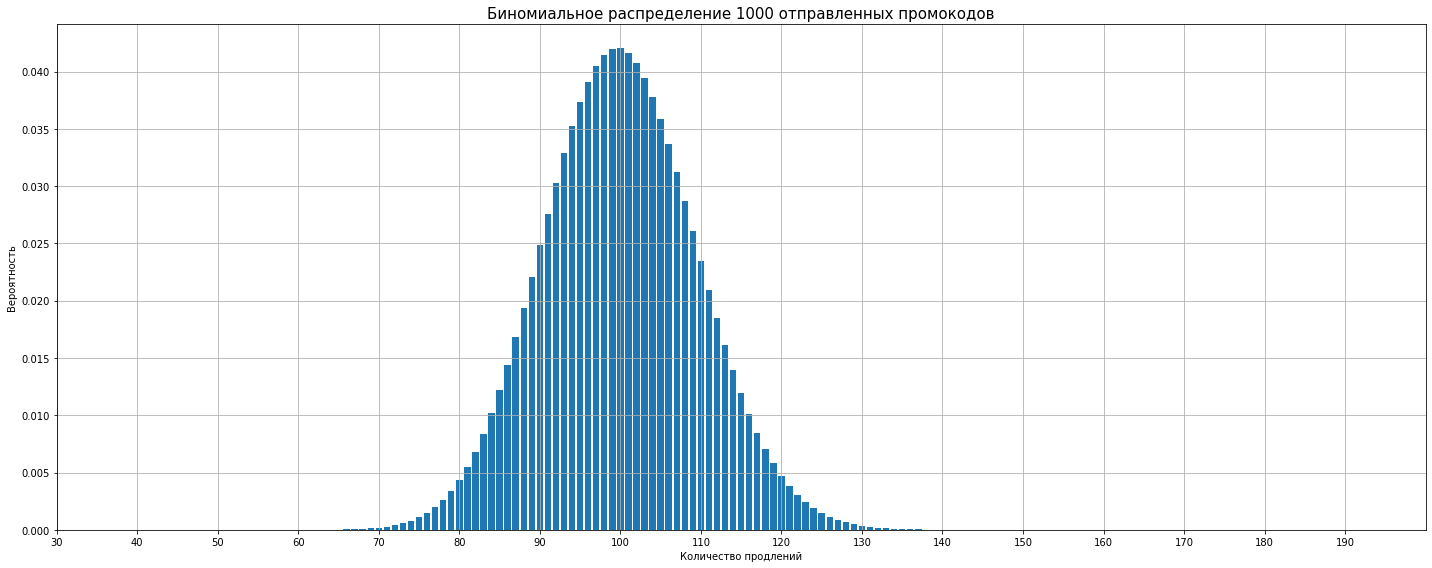

In [53]:
p = 0.1
k = 100
n = 1000

distr = [] 

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) 
    distr.append(current_value)
    
    
plt.figure(figsize=(20, 8))
plt.bar(range(0, n + 1), distr)
plt.title('Биномиальное распределение 1000 отправленных промокодов', fontsize=15)
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.xlim(30, 200)  
plt.xticks(np.arange(30, 200, step=10))
plt.grid(axis='both')
plt.tight_layout()

plt.show()

По графику распределения видно что, получить 100 продлений при отправке 1000 промокодов. Однако слишком велика вероятность, что успехов будет меньше. На гистограмме видно, что в диапазоне от 65 до 98 половина всего распределения, то есть велик риск не получить нужное количество продлений. Попробуем увеличить количество отправленных промокодов до 1100.

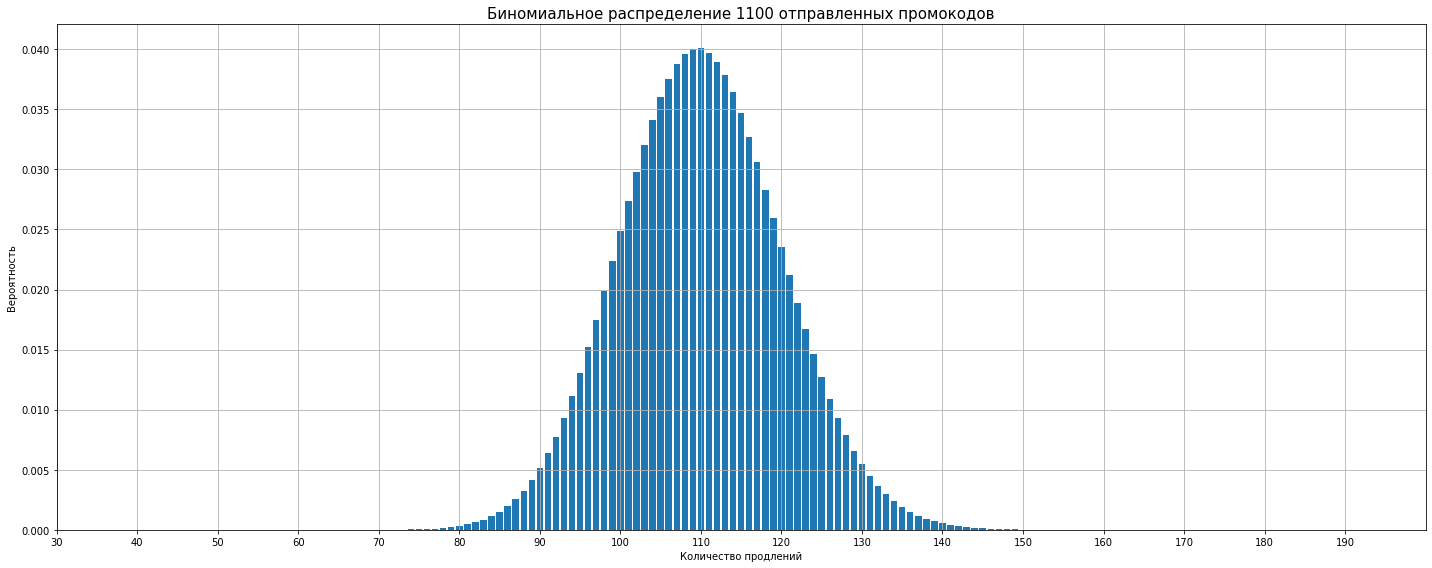

In [54]:
p = 0.1
k = 100
n = 1100

distr = [] 

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) 
    distr.append(current_value)
    
    
plt.figure(figsize=(20, 8))
plt.bar(range(0, n + 1), distr)
plt.title('Биномиальное распределение 1100 отправленных промокодов', fontsize=15)
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.xlim(30, 200)  
plt.xticks(np.arange(30, 200, step=10))
plt.grid(axis='both')
plt.tight_layout()

plt.show()

При количестве отправок 1100 промокодов мы уже ближе к истине и вероятность успеха приближается к необходимой 95%-ой. Попробуем еще немного увеличить количество отправленных промокодов до 1160.

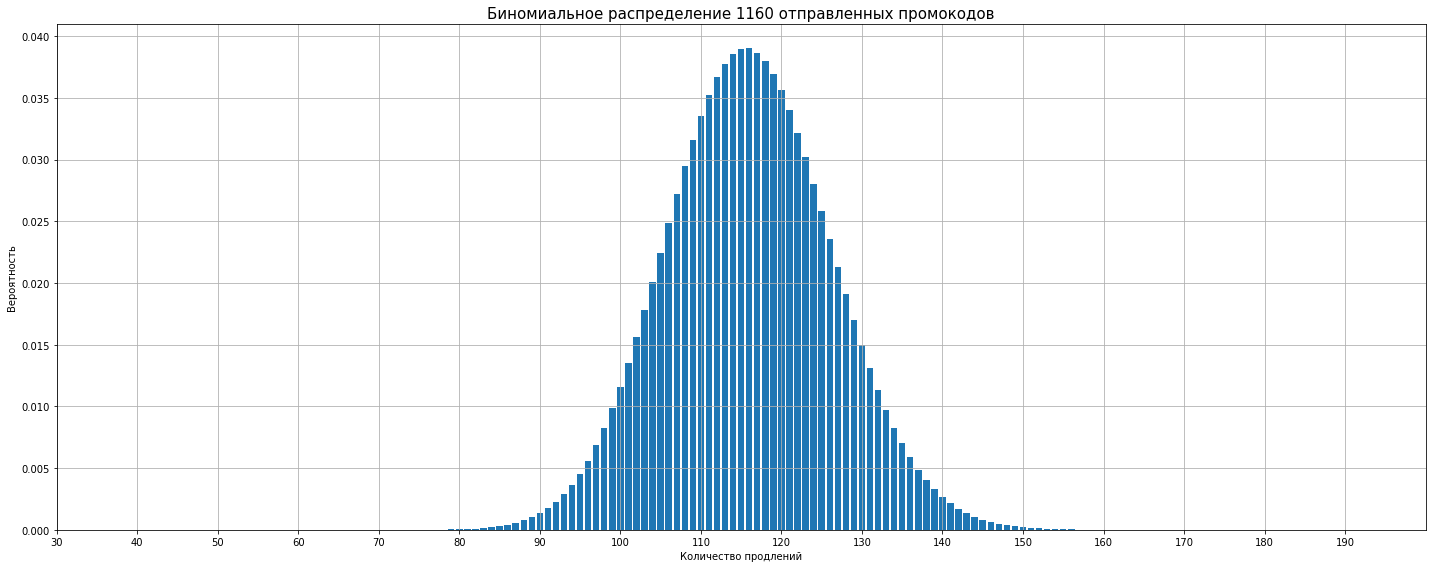

In [55]:
p = 0.1
k = 100
n = 1160

distr = [] 

for k in range(0, n + 1):
    current_value = binom.pmf(k, n, p) 
    distr.append(current_value)
    
plt.figure(figsize=(20, 8))
plt.bar(range(0, n + 1), distr)
plt.title('Биномиальное распределение 1160 отправленных промокодов', fontsize=15)
plt.xlabel('Количество продлений')
plt.ylabel('Вероятность')
plt.xlim(30, 200)  
plt.xticks(np.arange(30, 200, step=10))
plt.grid(axis='both')
plt.tight_layout()

plt.show()

Кажется верное значение найдено, и вероятность получить менее 100 продлений около 5%. Так как левее значения 100 продлений лежит примерно 5% от общей площади графика. Таким образом необходимое количество отправленных промокодов 1160.

***7.2. Наша задача:*** Найти вероятность того что при отправке уведоиления 1 млн. открыты будут не более 399500 уведомленийОтдел маркетинга рассылает клиентам push-уведомления в мобильном приложении. Клиенты могут открыть его или не открывать. Известно, что уведомления открывают около 
40 % получивших клиентов. Отдел планирует разослать 1 млн уведомлений. С помощью аппроксимации постройте примерный график распределения и оцените вероятность того, что уведомление откроют не более 399,5 тыс. пользователей.

Сначала добавим необходимый модуль ***norm*** библиотеки ***scipy.stats***, для работы с нормальным распределением.

In [56]:
from scipy.stats import norm

Вводим переменные ***n*** равную 1000000 (общее количество уведомлений) и ***p*** равную 0.4 (40% вероятность открытия уведомлений). На основании этих переменных рассчитаем ***mu*** (математическое ожидание) и ***sigma*** (стандартное отклонение) для нормального распределения.   

In [57]:
n = 1000000
p = 0.4

mu = n * p
sigma = np.sqrt(n * p * (1 - p))

После этого задаем параметры для построения графика вводим значения по оси ***X*** используя функцию ***np.linspace*** которая создаст массив с равномерно распределенными значениями между двумя заданными числами, нижним переделом на расстоянии 3х стандартных отклонений от среднего и верхним также на расстоянии 3х стандатных отклонений и задаем количество точек - 1000. По оси ***y*** c помощью функции ***norm.pdf*** вычисляем значение функции плотности вероятности для нормального распределения.

In [58]:
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 1000)
y = norm.pdf(x, mu, sigma)

Строим график на основании полученных значений

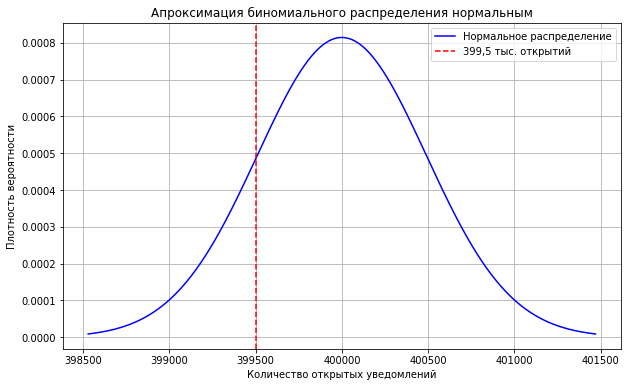

In [59]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Нормальное распределение', color='blue')
plt.title('Апроксимация биномиального распределения нормальным')
plt.xlabel('Количество открытых уведомлений')
plt.ylabel('Плотность вероятности')
plt.axvline(x=399500, color='red', linestyle='--', label='399,5 тыс. открытий')

plt.legend()
plt.grid()
plt.show()

На графике распределения мы видим колоколообразную форму котоая говорит о нормальном распредлении значений вокруг среднего значения в 400 000 открытий. Площадь под графиком слева от красной линии говорит о веротяности открытия интересующего нас количество в 399500 или меньшего количества пользователей. Визуально можно сказать что веротяность до 20%. Рассчитаем это значение с помощью функции ***cdf***.

In [60]:
x_value = 399500
probability = norm.cdf(x_value, mu, sigma)

print(f"Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: {probability * 100:.2f}%")

Вероятность того, что уведомление откроют не более 399,5 тыс. пользователей: 15.37%


#### Общий вывод

Исследование проводилось на основании данных предоставленных сервисом аренды самокатов Go Fast в виде трех датасетов включающих:  
  1. Пользователи — users_go.csv
- user_id (уникальный идентификатор пользователя);
- name (имя пользователя);
- age (возраст);
- city (город);
- subscription_type (тип подписки free, ultra).  

2. Поездки — rides_go.csv  
- user_id (уникальный идентификатор пользователя);
- distance (расстояние, которое пользователь проехал в текущей сессии (в метрах));
- duration (продолжительность сессии (в минутах) — время с того момента, как пользователь нажал кнопку «Начать поездку» до момента, как он нажал кнопку «Завершить поездку»);
- date (дата совершения поездки).  

3. Подписки — subscriptions_go.csv
- subscription_type	(тип подписки);
- minute_price (стоимость одной минуты поездки по данной подписке);
- start_ride_price (стоимость начала поездки);
- subscription_fee (стоимость ежемесячного платежа).

Перед непосредственным анализом показателей была проведена предобработка данных для приведения их к корректному виду, были выполнены следующие действия:   

- в датафрейме ***users*** удалены строки-дубликаты в количестве 31 строка. 


  в датафрейме ***rides***:
- изменен тип данных в столбце date с object на datatime64;
- выведен отдельный столбец date_month с указанием месяца по каждой поездке.  


- в датафрейме ***subscriptions***, нет пропусков в данных, как и в остальных датафреймах.  

На этапе исследовательского анализа данных были сделаны выводы:  
- ***Частота встречаемости городов***. Большего всего пользователей в Пятигорске 219, а самое маленькое количество в Москве 168. Однако интересен факт - что Москва, в которой самое большое по численности население из представленных городов, на последнем месте списка, стоит проанализировать причины, возможно высокая конкуренция и более интересные условия у конкурентов или же техническое оснащения парка ниже чем у конкурентов.
- ***Cоотношение пользователей с подпиской и без подписки*** Во всех городах число пользователей использующих сервис без подписки выше, чем с подпиской. Исключение - Москва, где одинаковое соотношение пользователей с подпиской и без нее. Самое большое число пользователей ез подписки - в Краснодаре (58.03%), а самое маленьков в Москве (50%). Здесь можно предположить, что пользователь не покупающий подписку, либо редко пользуется сервисом и не видит необходимости оплаты подписки на целый месяц или же наравне с GoFast пользуется альтернативными сервисами аренды самокатов в своем городе.   
- ***Возраст пользователей*** Пользователи представлены в возрастах от 12 до 43 лет. А средний возраст пользователя 25 лет.  
25-й процентиль (25%): 22 года. Это означает, что у 25% возраст пользователей младше или равен этому возрасту.  
75-й процентиль (75%): 28 лет. Указывает что более четверти клиентов имеют возраст больше или равный 28 годам.Основная возрастная группа пользователей от 18 до 30 лет. Возможно пердвижение с помощью сервиса аренды самокатов предпочтительнее для данной группы так как не требует наличия водительских прав и удобно ввиду активного образа жизни. После 28 лет интерес к сервису значительно снижается, возможно такое снижение связано с наличием автомобиля у более страших возрастных групп, а также появлением семьи и ребенка и самокат уже не подходит под нужды данной группы. После 35 лет количество пользователей падает еще заметнее, что указывает на отсутствие интереса к такому виду транспорта. Также стоит обратить внимание на пользователей до 18 лет, их не много, относительно общего числа пользователей - хотя быть не должно вообще, так как использвание сервисов аренды самокатов лицам не достигшим 18-летнего возраста запрещено и стоит продумать над ограничением аренды для несовершеннолетних.  
- ***Расстояние, которое пользователь преодолел за одну поездку*** Медианное количество поездок одного пользователя 12. Максимальное количество 27, а минимальное 2. Всего 1534 пользователя совершили 18068 поездок.Разброс дальности поездок по расстоянию от 0.85 м. (менее 1 метра) до 7211 м. (7,2 км.). Медианное расстояние преодолеваемое пользователями за одну поездку 3133 м. (3,1 км.), что говорит о выборе сервиса аренды самокатов для преодоления расстояние в несколько километров. Стандартное отклонение 1116.83 м.(1,1 км.), то есть разброс значений по расстоянию поездки в пределах этого значения, можно сказать что расстояния, которые преодолевают пользователи, варьируются существенно.Границы диаграммы размаха говорит о том, что основная часть поездок по расстоянию от 693.73 м. (0,6 км.) до 5625.71 м.(5.6 км.). Судя по вышеописанным статистическим данным, можно сказать, что использование самокатов довольно популярно среди пользователей для преодоления расстояний, близких к 3 километрам, с заметными вариациями в длине поездок. При этом есть пользователи, которые используют самокаты для коротких поездок и долгих расстояний.  
- ***Продолжительность поездок*** Медианное время поездки 17,75 мин., а среднее 17.96 мин., это говорит о том, что не смотря на наличие очень которких и очень длительных поездок отноcительно основной массы, их не много и они не сильно искажают представление о средней длительности поездки пользователей. Стандартное отклоенение 6.03 мин., говорит о том, что длительность поездок варьируется относительно среднего на 6.03 минуты, указывая на разнообразие в длительности поездок. Минимальное время 2.04 мин., говорит о коротких поездках на небольшие расстояния.
25-й процентиль (25%): 13.69 минуты. Это означает, что 25% поездок длится 13.69 минут или меньше.
75-й процентиль (75%): 21.82 минуты. Это значение указывает на длительность, равную или меньшую 21.82 минуты у 75% поездок, что означает, что более четверти поездок длится дольше.
Большинство пользователей заканчивают свои поездки в диапазоне от 14 до 22 минут, что может указывать на частое использование для удобных, средних маршрутов.
Важно обратить внимание на поездки с длительностью более 42 минут и понять, что могло привести к таким долгим поездкам. Это может включать в себя анализ маршрутов, адресов отправления и назначения, а также потенциальные задержки или время ожидания пользователя в момент остановок.  

На следующем этапе проанализировали поведение пользователей с подпиской и без по времени и расстоянию которое они преододевают. Пользователи с подпиской в среднем проводят больше времени на поездках, но эта разница не кажется значительной. Существует меньшее разнообразие в длительности поездок у подписчиков, что может указывать на более целенаправленное использование самокатов.  
Интересно неравномерное распределение дальности поездок у пользователей с подпиской этот 'провал' на интервале от 1.8 до 2 км., а у пользователей без подписки от 1.3 до 1.6 км., это может говорить о том что при необходимости преодолеть эти расстояния пользователи предпочитают другие способы передвижения. 
Пользователи без подписки больше используют самокат для преодоления расстояний менее 1000 метров и наиболее часто проезжают примерно 2,5 км. до 3,8 км. А вот пользователи Ultra предпочитают самокат для преодоления от 3 до 3,5 км.


Есть еще один важный момент в разнице поведения пользователей, если обратим внимание на поездки до 15 минут то у пользователей без подписки гораздо больше поездок на короткие расстояния до 500 метров где им требуется очень много времени на преодоление дистанции, что противоречит здравому смыслу когда арендуешь самокат. Причину такой аномалии стоит детально проанализировать, а пока предположить можно следующие причины:
- технически неисправные самокаты, это может увеличить общее время поездки.
- пользователи, которые не привыкли к электросамокатам или только начинают пользоваться ими, могут ехать медленно, опасаясь упасть или столкнуться с препятствиями.
- маршрут пользователей имеет много препятствий (пешеходы, автомобильный транспорт, нерегулируемые перекрестки и т.д.), это может заставить пользователей снижать скорость или остановливаться очень часто.

Далее выволнено создание сводной таблицы из 3х представленных датафреймов для анализа выручки от пользователей помесячно. Средняя помесячная выручка от одного пользователя составляет примерно 342.08 руб.
Стандартное отклонение показывает, насколько сильно выручка варьируется вокруг среднего значения. В данном случае, стандартное отклонение составляет примерно 151.96. Это означает, что у многих пользователей выручка довольно существенно отличается от среднего.
Минимальная помесячная выручка от одного пользователя составляет 74 руб.
Максимальная помесячная выручка от одного пользователя составляет 1428 руб.
25% (Q1): Это значение указывает на то, что 25% пользователей имеют выручку ниже 234 руб.
50% (медиана):: Половина пользователей приносит меньше 319 руб. Это говорит о том, что у большинства пользователей выручка ниже среднего.
75% (Q3): 75% пользователей имеют помесячную выручку ниже 415 руб. это говорит о том, что среди 25% пользователей выручка достаточно высокая по сравнению с другими.  

Следующим этапом проведены тесты для проверки гипотез, необходимых для запуска акции чтобы увеличить количество пользователей с подпиской, проверены следующие гипотезы:
-  ***Тратят ли пользователи с подпиской больше времени на поездки?***  
В результате теста, была отвергнута гипотеза о том, что пользователи с подпиской и без тратят равное количество времени на поездки. Все таки с подпиской времени тратится больше. Возможно что при наличии подписки, пользователи чаще используют самокаты, что показывает основание для привлечения пользователей к подписке для увеличения времени использования и выручки от них соответственно.
- ***Cреднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров?***  
На основании данных предоставленных сервисом GoFast нет статистически значимых доказательств того, что среднее расстояние, проезжаемое пользователями с подпиской, превышает 3130 метров.
Это может означать, что подписка не приводит к значительным изменениям в расстоянии поездок, либо, возможно, выборка не достаточно велика или разнообразна для получения более точных результатов.  
- ***Будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.?*** 
Можно твергнуть нулевую гипотезу, которая утверждает, что выручка от пользователей с подпиской не превышает выручку от пользователей без подписки и верна альтернативная гипотеза, что выручка от пользователей с подпиской значительно выше, чем у пользователей без подписки.

Завершающим этапом необходимо было ответить на вопросы:  
- ***Определить минимальное количество промокодов, которые нужно разослать, чтобы с вероятностью 95% как минимум 100 клиентов продлили подписку***   
Необходимое количество отправленных промокодов 1160 для получения 100 оплаченных подписок с веротяностью 95%.

- ***Оценить вероятность того, что уведомление откроют не более 399,5 тыс. пользователей из 1 млн.***.  
Вероятность того, что уведомление откроют не более 399,5 тыс. при отправке 1 млн. пользователей: 15.37%


***Общие рекомендации заказчику:***
- обратить внимание на ипользование сервиса несовершеннолетними, проанализировать сиситему регистрации и ограничить доступ возрастной категории до 18 лет во избежание финансовых, имиджевых потерь и судебных процедур.  
- рассмотреть возможность донести до пользователей без подписки используя данные об их передвижениях сколько они могли бы сэкономить при подключении подписки сервиса.  
- проанализировать маршруты пользователей без подписки с целью выявления причин преодоления коротких расстояний за слишком большой промежуток времени, так как это может снижать активность пользователей с точки зрения новых поездок. 
- проверить техническую сторону приложения для исправления ошибок во времени затраченном на преодоления маршрута пользователем.